In [49]:
import sys
sys.path.append('../script/')
from GeneticAlgo import *
from utility_GA_BSpline import *

%matplotlib inline
plt.style.use('dark_background')
#plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=12)

# 1. Run GA

### 1.1 Setup Objective and GA Optimizer

In [50]:
def DefineFitness(DNA):
    coeff = TranslateDNA(DNA)
    t = np.linspace(-0.2,1.2,15) #15=3+11+3=k+node+k
    k = 2
    spl = BSpline(t, coeff, k, extrapolate=False)
    
    w     = np.linspace(0,1,100)
    truth = 1/2*np.sin(5*w)+np.cos(10*w)
    guess = spl(w)
    
    var   = np.mean((truth-guess)**2)
    fitness = 1/var
    #fitness = np.exp(-0.1*var)
    return fitness

In [51]:
ga = GA(pop_size    = 100,
        DNA_size    = 12, 
        DNA_fitness = DefineFitness,
        cross_rate  = 0.8,
        mutate_rate = 0.01,
        noise_rate  = 0.8,
        noise_amp   = 0.01
       )

### 1.2 Start GA Evolution

In [52]:
for generation in range(61):
    ga.evolve()
fitness  = ga.get_pop_fitness()
best_DNA = ga.pop[np.argmax(fitness)]

### 1.3 Plot Final The Best DNA 

In [71]:
def PlotGeneration(fitness,best_DNA,generation):
    fig, axes = plt.subplots(2, 1, sharex=False, 
                             gridspec_kw={'height_ratios':[2,1]},
                             figsize=(5,5))
    ax = axes[0]
    
    w     = np.linspace(0,1,100)
    truth = 1/2*np.sin(5*w)+np.cos(10*w)
    coeff = TranslateDNA(best_DNA)
    spl   = BSpline(np.linspace(-0.2,1.2,15), coeff, 2, extrapolate=False)
    guess = spl(w)
    ax.plot(w, truth, lw=3, color='w',linestyle='--',label="Ground Truth")
    ax.plot(w, guess,lw=2,label="Best Guess")
    
    ax.set_xlim(0.05,0.95)
    ax.set_ylim(-3,4)
    ax.legend(fontsize=11)
    ax.grid()
    ax.set_title('Generation {}'.format(generation))
    
    ax = axes[1]
    ax.hist(fitness,bins=np.arange(0,200,4),histtype="stepfilled",lw=0,label='Fittness')
    #ax.legend()
    ax.grid()
    ax.set_xlabel("Generation Fitness")

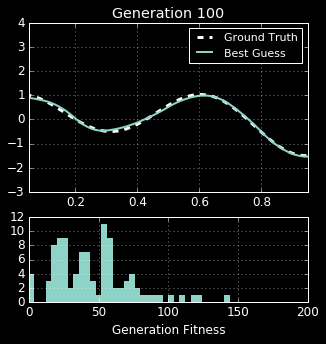

In [72]:
PlotGeneration(fitness,best_DNA,generation)
plt.savefig('../plot/GA_BSpline.png',dpi=200)

# 2. Visualize Evolution

In [73]:
ga = GA(pop_size    = 100,
        DNA_size    = 12, 
        DNA_fitness = DefineFitness,
        cross_rate  = 0.8,
        mutate_rate = 0.01,
        noise_rate  = 0.8,
        noise_amp   = 0.01
       )

w     = np.linspace(0,1,100)
truth = 1/2*np.sin(5*w)+np.cos(10*w)


for generation in range(101):
    ga.evolve()
    fitness  = ga.get_pop_fitness()
    best_DNA = ga.pop[np.argmax(fitness)]
    PlotGeneration(fitness,best_DNA,generation)
    plt.savefig('../plot/evolve/{}.png'.format(generation),dpi=200)
    plt.close()